In [35]:
import os
import scipy
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basedir = 'output'
methods = ['Random', 'ModelFuzz', 'Trace']
file_map = {'Random': 'random', 'ModelFuzz': 'state', 'Trace': 'trace'}
data = []
iters = 10000
m_vals = [5, 6, 7]
n_vals = [10, 20, 30, 40]
# present with m=7, n=10
reps = 10
set_m = 6
set_n = 40

In [36]:
cov = {}
for method in methods:
    for m in m_vals:
        for n in n_vals:
            for i in range(reps):
                with open(os.path.join(basedir, f'{file_map[method]}_{m}_{n}_cov_{i}.csv'), 'r') as f:
                    csv = f.readlines()
                    csv = np.array(list(map(int, csv)))
                    key = f'{method}_{m}_{n}'
                    if key not in cov.keys():
                        cov[key] = []
                    cov[key].append(csv)

range_cov = {}
for m in m_vals:
    for n in n_vals:
        data = {}
        for method in methods:
            key = f'{method}_{m}_{n}'
            covs = np.array(cov[key])
            high = []
            low = []
            avg = []
            for i in range(iters):
                vals = covs[:, i]
                low.append(vals.min())
                high.append(vals.max())
                avg.append(vals.mean())
            data[method] = [high, low, avg]
        range_cov[f'{m}_{n}'] = data
            
avg_cov = {}
for method in methods:
    for m in m_vals:
        for n in n_vals:
            key = f'{method}_{m}_{n}'
            arr = np.array(cov[key])
            avg_cov[key] = np.mean(arr, axis=0)

bugs = {}
for method in methods:
    for m in m_vals:
        for n in n_vals:
            with open(os.path.join(basedir, f'{file_map[method]}_{m}_{n}_bugs.csv'), 'r') as f:
                csv = f.readlines()
                csv = np.array(list(map(int, csv)))
                key = f'{method}_{m}_{n}'
                bugs[key] = csv
                
bug_iters = {}
for method in methods:
    for m in m_vals:
        for n in n_vals:
            with open(os.path.join(basedir, f'{file_map[method]}_{m}_{n}_bug_iters.csv'), 'r') as f:
                csv = f.readlines()
                csv = [e for e in list(map(int, csv)) if e != 1000000]
                key = f'{method}_{m}_{n}'
                bug_iters[key] = csv       

/var/folders/j2/zz0q12z51bz_qqwd9bv8qhz80000gn/T/ipykernel_46546/1879339851.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


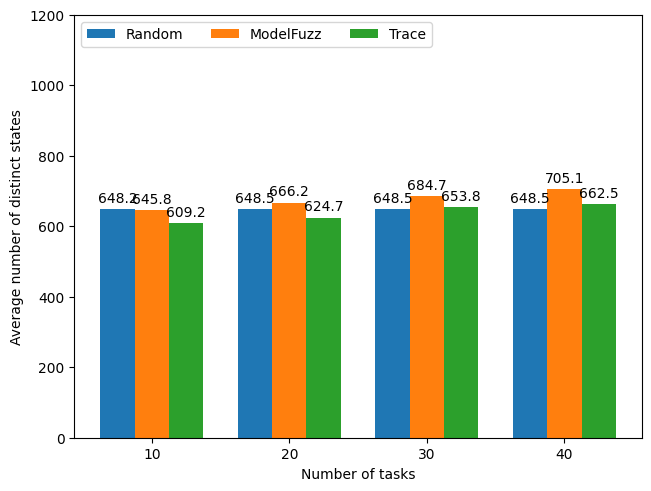

In [37]:
x = np.arange(len(n_vals))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
m = set_m
results = {}
for method in methods:
    for n in n_vals:
        if method not in results.keys():
            results[method] = tuple()
        key = f'{method}_{m}_{n}'
        results[method] += (np.max(avg_cov[key]),)

for method, coverage in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, coverage, width, label=method)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average number of distinct states')
ax.set_xlabel('Number of tasks')
# ax.set_title('Average coverage of the schedulers with 7 workers')
ax.set_xticks(x + width, n_vals)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1200)
fig.show()

/var/folders/j2/zz0q12z51bz_qqwd9bv8qhz80000gn/T/ipykernel_46546/2280424986.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


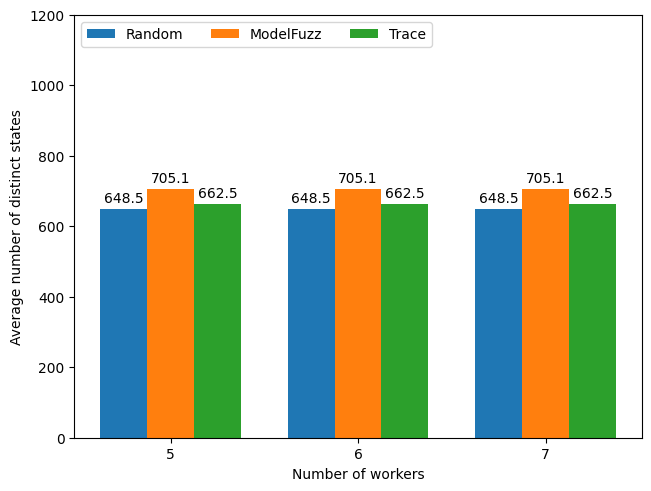

In [38]:
x = np.arange(len(m_vals))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
n = set_n
results = {}
for method in methods:
    for m in [set_m]:
        if method not in results.keys():
            results[method] = tuple()
        key = f'{method}_{m}_{n}'
        results[method] += (max(avg_cov[key]),)

for method, coverage in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, coverage, width, label=method)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average number of distinct states')
ax.set_xlabel('Number of workers')
# ax.set_title('Average coverage of the schedulers with 7 workers')
ax.set_xticks(x + width, m_vals)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1200)
fig.show()

/var/folders/j2/zz0q12z51bz_qqwd9bv8qhz80000gn/T/ipykernel_46546/2743324143.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x/1000))+"k" for x in ax.get_xticks()])


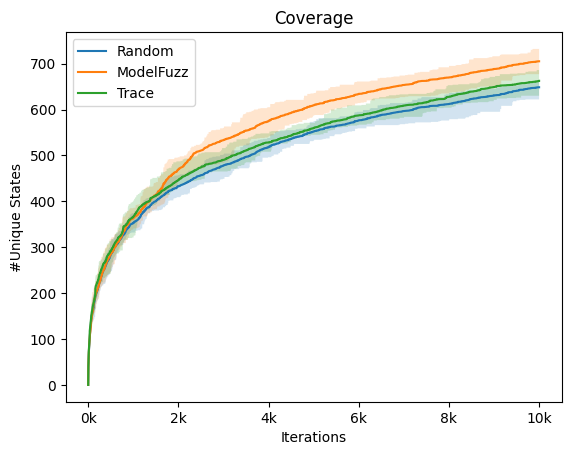

In [39]:
fig, ax = plt.subplots()

colors = {
    "Random": "tab:blue",
    "ModelFuzz": "tab:orange",
    "Trace": "tab:green",
    "Line": "tab:red"
}

for (b, bands) in range_cov['6_40'].items():
    ax.plot(np.arange(len(bands[0])), bands[2], label=b, color=colors[b])
    ax.fill_between(np.arange(len(bands[0])), bands[0], bands[1], alpha=0.2)

ax.set_xlabel('Iterations')
ax.set_ylabel('#Unique States')
ax.set_title("Coverage")
ax.legend()

ax.set_xticklabels([str(int(x/1000))+"k" for x in ax.get_xticks()])
# ax.set_yticklabels([str(int(y/1000))+"k" for y in ax.get_yticks()])

# plt.show()
plt.savefig('figures/mb_coverage.pdf', dpi=600)

In [40]:
sig_count = 0
test_count = 0
for m in [set_m]:
    for n in n_vals:
        i = 1
        print(f'M = {m} , N = {n}')
        for j in range(len(methods)):
            if j == i:
                continue
            test_count += 1
            stat, p = scipy.stats.mannwhitneyu([max(covs) for covs in cov[f'{methods[i]}_{m}_{n}']], [max(covs) for covs in cov[f'{methods[j]}_{m}_{n}']])
            if p <= 0.05:
                sig_count += 1
            print(f'P-value for M-W u test with ModelFuzz and {methods[j]}: {p} , Significance: {p <= 0.05}')

print(f'\nFor all experiments with different parameter values, {sig_count} out of {test_count} tests were significant at alpha level 0.05')

M = 6 , N = 10
P-value for M-W u test with ModelFuzz and Random: 0.676203530099396 , Significance: False
P-value for M-W u test with ModelFuzz and Trace: 0.0016857381150136568 , Significance: True
M = 6 , N = 20
P-value for M-W u test with ModelFuzz and Random: 0.04079302705072225 , Significance: True
P-value for M-W u test with ModelFuzz and Trace: 0.0005772900275846421 , Significance: True
M = 6 , N = 30
P-value for M-W u test with ModelFuzz and Random: 0.0008495159836552015 , Significance: True
P-value for M-W u test with ModelFuzz and Trace: 0.004510263631180406 , Significance: True
M = 6 , N = 40
P-value for M-W u test with ModelFuzz and Random: 0.00017561553104590864 , Significance: True
P-value for M-W u test with ModelFuzz and Trace: 0.0004352787705177256 , Significance: True

For all experiments with different parameter values, 7 out of 8 tests were significant at alpha level 0.05


In [41]:
def ranksum(A:list, B:list):
    data = A + B
    ranked_data = scipy.stats.rankdata(list(map(lambda x: iters - x, data)))
    ranks = {}
    for i, d in enumerate(data):
        ranks[d] = ranked_data[i]
    return sum([ranks[e] for e in A])

def a_hat_12(A, B):
    m = len(A)
    n = len(B)
    return ((ranksum(A, B) / m) - ((m+1) / 2)) / n

In [42]:
df = {}
index = 0
for m in m_vals:
    for n in n_vals:
        i = 1
        for j in range(len(methods)):
            if j == i:
                j += 1
                continue
            A = bug_iters[f'{methods[i]}_{m}_{n}']
            B = bug_iters[f'{methods[j]}_{m}_{n}']
            if len(A) > 0 and A is not None:
                if len(B) > 0 and B is not None:
                    stat = a_hat_12(A, B)
                else:
                    stat = 1.0
            else:
                stat = 0.0
            df[index] = {'A': methods[i], 'B': methods[j], 'M': m, 'N': n, 'Statistic': stat, 'Significance': stat >= 0.6}
            index += 1
            j+= 1
df = pd.DataFrame(df).T
# df = df[df.M == set_m]
df.sort_values(by=['B', 'M', 'N'])

,A,B,M,N,Statistic,Significance
0,ModelFuzz,Random,5,10,0.805,True
2,ModelFuzz,Random,5,20,1.0,True
4,ModelFuzz,Random,5,30,1.0,True
6,ModelFuzz,Random,5,40,1.0,True
8,ModelFuzz,Random,6,10,0.855,True
10,ModelFuzz,Random,6,20,1.0,True
12,ModelFuzz,Random,6,30,1.0,True
14,ModelFuzz,Random,6,40,1.0,True
16,ModelFuzz,Random,7,10,0.71,True
18,ModelFuzz,Random,7,20,1.0,True


In [43]:
print(f'For all experiments with different parameter values, {len(df[df.Significance])} out of {len(df)} tests were significant at alpha level 0.4')

For all experiments with different parameter values, 17 out of 24 tests were significant at alpha level 0.4


/Users/berkay/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/berkay/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/j2/zz0q12z51bz_qqwd9bv8qhz80000gn/T/ipykernel_46546/1314169994.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


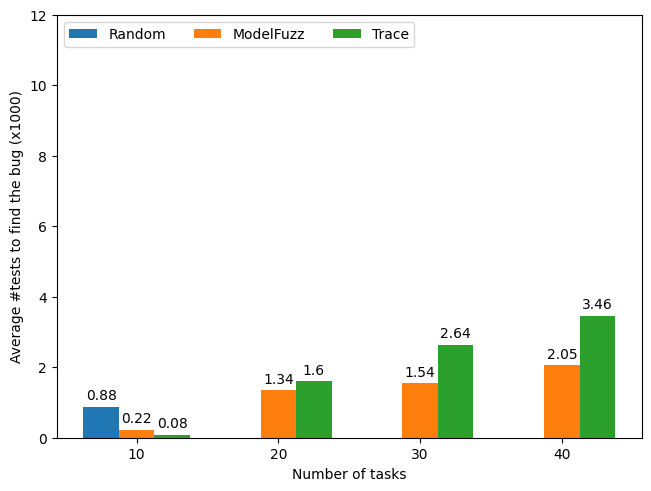

In [44]:
x = np.arange(len(n_vals))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
m = set_m
results = {}
for method in methods:
    for n in n_vals:
        if method not in results.keys():
            results[method] = tuple()
        key = f'{method}_{m}_{n}'
        results[method] += (np.mean(bug_iters[key]),)
div = 1000
for method, bug_iter in results.items():
    bug_iter = tuple(np.around(b/div, 2) for b in bug_iter)
    offset = width * multiplier
    rects = ax.bar(x + offset, bug_iter, width, label=method)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average #tests to find the bug (x1000)')
ax.set_xlabel('Number of tasks')
# ax.set_title('Average coverage of the schedulers with 7 workers')
ax.set_xticks(x + width, n_vals)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 12)
fig.show()

/var/folders/j2/zz0q12z51bz_qqwd9bv8qhz80000gn/T/ipykernel_46546/3670578605.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


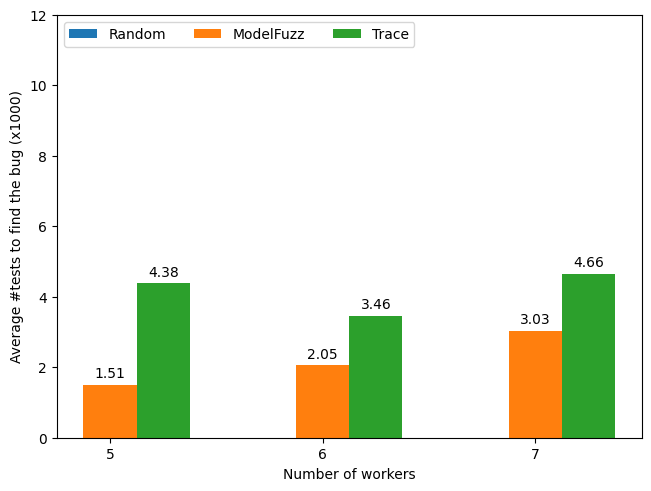

In [45]:
x = np.arange(len(m_vals))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
n = set_n
results = {}
for method in methods:
    for m in m_vals:
        if method not in results.keys():
            results[method] = tuple()
        key = f'{method}_{m}_{n}'
        results[method] += (np.mean(bug_iters[key]),)
div = 1000
for method, bug_iter in results.items():
    bug_iter = tuple(np.around(b/div, 2) for b in bug_iter)
    offset = width * multiplier
    rects = ax.bar(x + offset, bug_iter, width, label=method)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average #tests to find the bug (x1000)')
ax.set_xlabel('Number of workers')
# ax.set_title('Average coverage of the schedulers with 7 workers')
ax.set_xticks(x + width, m_vals)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 12)
fig.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{10: {'Random': [0.579, 0.129, 0.829, 0.408, 3.439, 1.073, 0.497, 0.203, 0.511, 0.219], 'ModelFuzz': [0.146, 0.129, 0.001, 0.311, 0.661, 0.221, 0.636, 0.203, 0.252, 0.311], 'Trace': [0.041, 0.182, 0.011, 0.082, 0.064, 0.032, 0.076, 0.026, 0.071, 0.146]}, 20: {'Random': [], 'ModelFuzz': [5.996, 2.036, 3.461, 1.251], 'Trace': [3.461, 0.526, 0.281, 0.841, 0.626, 1.621, 0.451, 0.521, 3.066, 0.161]}, 30: {'Random': [], 'ModelFuzz': [2.191, 2.241, 3.206, 2.281, 2.741, 2.661], 'Trace': [1.131, 1.371, 7.266, 0.771, 1.376, 3.761, 2.906, 0.281, 1.616, 3.126]}, 40: {'Random': [], 'ModelFuzz': [2.856, 3.201], 'Trace': [0.896, 5.076, 1.366, 7.046, 8.916]}}


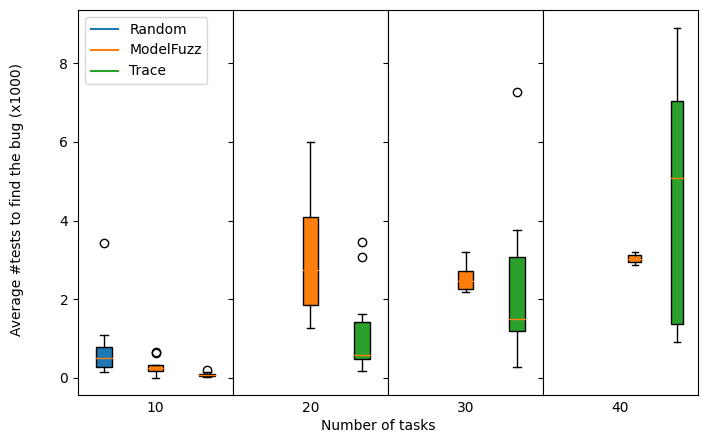

In [46]:
x = np.arange(len(n_vals))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

m = 7
data = {}
scale = 1000
for method in methods:
    for n in n_vals:
        if method not in results.keys():
            results[method] = tuple()
        key = f'{method}_{m}_{n}'
        scaled = [iter_ / scale for iter_ in bug_iters[key]]
        if n not in data.keys():
            data[n] = {}
        data[n][method] = scaled
print(data)

fig, axes = plt.subplots(ncols=len(n_vals), sharey=True, figsize=(8,5))
fig.subplots_adjust(wspace=0)

# plt.hold(True)
colors = ['tab:blue', 'tab:orange', 'tab:green']

for ax, n in zip(axes, n_vals):
    bp = ax.boxplot([data[n][method] for method in methods],
                     patch_artist=True)
    ax.set(xlabel=n, label=None)
    ax.set_xticks([])
    ax.margins(0.05) # Optional
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

# ax.set_xticklabels(n_vals)
# ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])

# draw temporary red and blue lines and use them to create a legend
hB, = plt.plot([1,1],'tab:blue')
hR, = plt.plot([1,1],'tab:orange')
hG, = plt.plot([1,1],'tab:green')
axes[0].legend((hB, hR, hG),('Random', 'ModelFuzz', 'Trace'), loc='upper left')
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

# fig.set(ylabel='Average #tests to find the bug (x1000)')
# fig.set(xlabel='Number of tasks')
fig.text(0.5, 0.04, 'Number of tasks', ha='center')
fig.text(0.04, 0.5, 'Average #tests to find the bug (x1000)', va='center', rotation='vertical')
# ax.set_ylim(0, 12)
fig.savefig('figures/mb_scaling_tasks_bugs.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{5: {'Random': [], 'ModelFuzz': [1.471, 1.306, 1.761], 'Trace': [0.151, 5.121, 7.031, 4.371, 3.251, 6.341]}, 6: {'Random': [], 'ModelFuzz': [1.716, 2.471, 1.836, 2.191], 'Trace': [7.346, 3.101, 2.496, 0.891]}, 7: {'Random': [], 'ModelFuzz': [2.856, 3.201], 'Trace': [0.896, 5.076, 1.366, 7.046, 8.916]}}


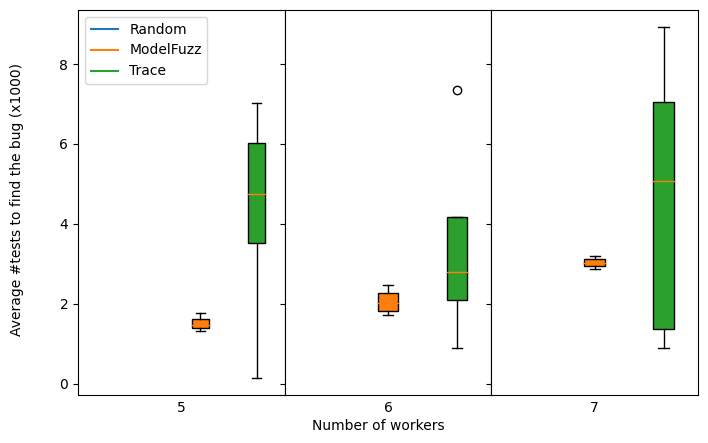

In [47]:
x = np.arange(len(m_vals))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

n = set_n
data = {}
scale = 1000
for method in methods:
    for m in m_vals:
        if method not in results.keys():
            results[method] = tuple()
        key = f'{method}_{m}_{n}'
        scaled = [iter_ / scale for iter_ in bug_iters[key]]
        if m not in data.keys():
            data[m] = {}
        data[m][method] = scaled
print(data)

fig, axes = plt.subplots(ncols=len(m_vals), sharey=True, figsize=(8,5))
fig.subplots_adjust(wspace=0)

# plt.hold(True)
colors = ['tab:blue', 'tab:orange', 'tab:green']

for ax, m in zip(axes, m_vals):
    bp = ax.boxplot([data[m][method] for method in methods],
                     patch_artist=True)
    ax.set(xlabel=m, label=None)
    ax.set_xticks([])
    ax.margins(0.05) # Optional
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

# ax.set_xticklabels(n_vals)
# ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])

# draw temporary red and blue lines and use them to create a legend
hB, = axes[0].plot([1,1],'tab:blue')
hR, = axes[0].plot([1,1],'tab:orange')
hG, = axes[0].plot([1,1],'tab:green')
axes[0].legend((hB, hR, hG),('Random', 'ModelFuzz', 'Trace'), loc='upper left')
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

# fig.set(ylabel='Average #tests to find the bug (x1000)')
# fig.set(xlabel='Number of tasks')
fig.text(0.5, 0.04, 'Number of workers', ha='center')
fig.text(0.04, 0.5, 'Average #tests to find the bug (x1000)', va='center', rotation='vertical')
# ax.set_ylim(0, 12)
fig.savefig('figures/mb_scaling_workers_bugs.eps')
